In [7]:
import pickle
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import random
import json
import os
import re
import seaborn as sns
import math

In [9]:
def read_total_size_data(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='caida20180517_10_caida20180816_0.pcap', window_size=200):
    res = []
    for epoch in epochs:
        
        path = f"../SketchPatternQuery/{algo}/{dataset}/"\
                f"{flowkey}/row_{row}_width_{width}_level_{level}_epoch_{epoch}_count_{count}_seed_{seed}/"
        
        for dir in sorted(os.listdir(path)):
            p = os.path.join(path, dir)
            if os.path.isdir(p): 
                window_dir = "window_" + str(window_size)
                full_path = os.path.join(path, dir, window_dir,'total_flow_size.txt')    
                with open(full_path, 'r') as f:
                    for val in f:
                        res.append(int(val))
            
    return res

# read_total_size_data()

## Prepare Dataset

In [104]:
## parameters

caida0517 = ["caida0517-500w", "caida0517-250w", "caida0517-125w"]
caida0816 = ["caida0816-600w", "caida0816-300w", "caida0816-150w"]
zipf2a = ["zipf2a-150w", "zipf2a-75w", "zipf2a-35w"]
zipf2b = ["zipf2b-40w", "zipf2b-20w", "zipf2b-10w"]
zipf4 = ["zipf4-60w", "zipf4-30w", "zipf4-15w"]


lens = [
        # ["5", "5"],
        ["6", "4"],
        # ["7", "3"],
        # ["8", "2"],
        ]

pcap_file = []
    
# # single dataset
# pcap_file.append("caida0517-500w_10_.pcap")
# pcap_file.append("caida0517-250w_10_.pcap")
# pcap_file.append("caida0517-125w_10_.pcap")
# pcap_file.append("caida0816-600w_10_.pcap")
# pcap_file.append("caida0816-300w_10_.pcap")
# pcap_file.append("caida0816-150w_10_.pcap")
# pcap_file.append("zipf2a-150w_10_.pcap") 
# pcap_file.append("zipf2a-75w_10_.pcap") 
# pcap_file.append("zipf2a-35w_10_.pcap") 
# pcap_file.append("zipf2b-40w_10_.pcap") 
# pcap_file.append("zipf2b-20w_10_.pcap") 
# pcap_file.append("zipf2b-10w_10_.pcap") 
# pcap_file.append("zipf4-60w_10_.pcap")
# pcap_file.append("zipf4-30w_10_.pcap")
# pcap_file.append("zipf4-15w_10_.pcap")


# # # same dist, caida
# for a in caida0517:
#     for b in caida0816:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
# for a in caida0816:
#     for b in caida0517:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
# # # same dist, zipf
# for a in zipf2a:
#     for b in zipf2b:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
# for a in zipf2b:
#     for b in zipf2a:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')

# # # diff dist, caida + zipf2a
# for a in caida0517:
#     for b in zipf2a:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
# for a in caida0816:
#     for b in zipf2a:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
# # # # diff dist, caida + zipf2b
# for a in caida0517:
#     for b in zipf2b:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
# for a in caida0816:
#     for b in zipf2b:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
# # # # diff dist, caida + zipf4
# for a in caida0517:
#     for b in zipf4:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
# for a in caida0816:
#     for b in zipf4:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')

# # # diff dist, zipf2a + caida
# for a in zipf2a:
#     for b in caida0517:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
#     for b in caida0816:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
# # # diff dist, zipf2b + caida
# for a in zipf2b:
#     for b in caida0517:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
#     for b in caida0816:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
# # # diff dist, zipf4 + caida
# for a in zipf4:
#     for b in caida0517:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
#     for b in caida0816:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')

# # # # diff dist, zipf 2a + zipf4
# for a in zipf2a:
#     for b in zipf4:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
# for a in zipf4:
#     for b in zipf2a:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
# # # # diff dist, zipf 2b + zipf4
for a in zipf2b:
    for b in zipf4:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
for a in zipf4:
    for b in zipf2b:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
            
            
print(pcap_file)    
print(f'Total Pcap File Number: {len(pcap_file)}')
# widths = [2048, 4096, 8192, 16384, 32768, 65536, 131072]
widths = [4096]
# widths = [1024]



['zipf2b-40w_6_zipf4-60w_4.pcap', 'zipf2b-40w_6_zipf4-30w_4.pcap', 'zipf2b-40w_6_zipf4-15w_4.pcap', 'zipf2b-20w_6_zipf4-60w_4.pcap', 'zipf2b-20w_6_zipf4-30w_4.pcap', 'zipf2b-20w_6_zipf4-15w_4.pcap', 'zipf2b-10w_6_zipf4-60w_4.pcap', 'zipf2b-10w_6_zipf4-30w_4.pcap', 'zipf2b-10w_6_zipf4-15w_4.pcap', 'zipf4-60w_6_zipf2b-40w_4.pcap', 'zipf4-60w_6_zipf2b-20w_4.pcap', 'zipf4-60w_6_zipf2b-10w_4.pcap', 'zipf4-30w_6_zipf2b-40w_4.pcap', 'zipf4-30w_6_zipf2b-20w_4.pcap', 'zipf4-30w_6_zipf2b-10w_4.pcap', 'zipf4-15w_6_zipf2b-40w_4.pcap', 'zipf4-15w_6_zipf2b-20w_4.pcap', 'zipf4-15w_6_zipf2b-10w_4.pcap']
Total Pcap File Number: 18


### Plot Total Flow Size

In [42]:
def plot_total_size_summation(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='zipf2a_3_caida20180517_7.pcap', window_size=500):
    
    # labels = ["Final TopK Sum", "Dynamic TopK Sum", "Final TopK Var", "Dynamic TopK Var", "Final TopK Sec Var", "Dynamic TopK Sec Var"]
    # labels = ["Final TopK Sum", "Dynamic TopK Sum", "Final TopK Sec Var", "Dynamic TopK Sec Var"]
    labels = ["Final TopK Sum", "Final TopK Sec Var",]

    res = []
    # sum
    result = read_total_size_data(algo, row, width, level, seed, count, flowkey, epochs, dataset, window_size)
    
    res.append(result)
       
    plt.figure(figsize=(12, 4))
    
    # sns.lineplot(data=res, dashes=False, markers=True, markersize=4)
    # for i, data_set in enumerate(res):
    #     plt.plot(range(1,21), data_set, label=f'Data Set {i + 1}')
        
    # print(dataset)
    for i in range(len(res)):
        plt.plot(res[i], label=labels[i])
        

    # Add labels and legend
    plt.xlabel('Time (sec)')
    plt.ylabel('Value')
    plt.title('%s Flow Size Summation (Window Size = %d)' % (dataset[:-5], window_size))
    # plt.axhline(10000, c="black")
    ticks = [i for i in range(int(10*1000/window_size) + 1)]
    adjusted_ticks = [tick * (window_size / 1000) for tick in ticks[0::int(1000 / window_size)]]
    plt.xticks(ticks[0::int(1000/window_size)], adjusted_ticks)
    plt.legend(loc='upper left', ncol=math.ceil(len(res)/4))

    # Show the plot
    plt.show()
    

# datasets = ['10_0.pcap/', '5_5.pcap/', '4_6.pcap/', '3_7.pcap/']
datasets = ["zipf2a_3_caida20180517_7.pcap/"]
# window_sizes = [100, 200, 500]
window_sizes = [200]
# plot_single_both(dataset=pcap_file[4], window_size=200)
# plot_single_both(dataset=datasets[0], window_size=500)

In [44]:
def plot_total_size_variation(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='zipf2a_3_caida20180517_7.pcap', window_size=500):
    
    # labels = ["Final TopK Sum", "Dynamic TopK Sum", "Final TopK Var", "Dynamic TopK Var", "Final TopK Sec Var", "Dynamic TopK Sec Var"]
    # labels = ["Final TopK Sum", "Dynamic TopK Sum", "Final TopK Sec Var", "Dynamic TopK Sec Var"]
    labels = ["Final TopK Sum", "Final TopK Sec Var",]

    res = []
    # sum
    result = read_total_size_data(algo, row, width, level, seed, count, flowkey, epochs, dataset, window_size)
    
    # res.append(result)
    
    # variation
    fin_res_var = [None]
    for i in range(1, len(result)):
        fin_res_var.append(result[i] - result[i-1])
        
    # res.append(fin_res_var)
    
    # second variation
    fin_sec_res_var = [None, None]
    for i in range(2, len(result)):
        fin_sec_res_var.append(abs(fin_res_var[i] - fin_res_var[i-1]))
        
    res.append(fin_sec_res_var)
    
    print(labels, len(labels))
    print(res, len(res))
    print(result)
    print(fin_res_var)
    print(fin_sec_res_var, len(res))
    print(f'max: {max(fin_res_var[1:])}, avg: {sum(fin_res_var[1:])/len(fin_res_var[1:])}, diff: {max(fin_res_var[1:]) - (sum(fin_res_var[1:])/len(fin_res_var[1:]))}')
    
    plt.figure(figsize=(12, 4))
    
    # sns.lineplot(data=res, dashes=False, markers=True, markersize=4)
    # for i, data_set in enumerate(res):
    #     plt.plot(range(1,21), data_set, label=f'Data Set {i + 1}')
        
    # print(dataset)
    for i in range(len(res)):
        plt.plot(res[i], label=labels[i])
        

    # Add labels and legend
    plt.xlabel('Time (sec)')
    plt.ylabel('Value')
    plt.title('%s Flow Size Variation (Window Size = %d)' % (dataset[:-5], window_size))
    # plt.axhline(10000, c="black")
    ticks = [i for i in range(int(10*1000/window_size) + 1)]
    adjusted_ticks = [tick * (window_size / 1000) for tick in ticks[0::int(1000 / window_size)]]
    plt.xticks(ticks[0::int(1000/window_size)], adjusted_ticks)
    plt.legend(loc='upper left', ncol=math.ceil(len(res)/4))

    # Show the plot
    plt.show()
    

# datasets = ['10_0.pcap/', '5_5.pcap/', '4_6.pcap/', '3_7.pcap/']
datasets = ["zipf2a_3_caida20180517_7.pcap/"]
# window_sizes = [100, 200, 500]
window_sizes = [200]
# plot_single_both(dataset=pcap_file[4], window_size=200)
# plot_single_both(dataset=datasets[0], window_size=500)

['Final TopK Sum', 'Final TopK Sec Var'] 2
[[None, None, 10205, 5497, 1068, 1219, 277, 458, 2634, 2873, 2661, 3139, 11059, 18126, 1221, 486, 1070, 18609, 1386, 2742, 59, 560, 1793, 2309, 1523, 5700, 1211, 1643, 1169, 779, 1358, 53615, 12534, 4398, 1341, 498, 295, 571, 927, 2182, 1513, 1359, 111, 1988, 269, 32, 34, 2615, 449, 144, 160]] 1
[0, 105568, 200931, 290797, 381731, 471446, 561438, 651888, 744972, 835183, 928055, 1024066, 1109018, 1175844, 1243891, 1312424, 1382027, 1470239, 1559837, 1646693, 1733608, 1819963, 1904525, 1986778, 2070554, 2160030, 2248295, 2334917, 2422708, 2509720, 2595374, 2627413, 2646918, 2662025, 2675791, 2689059, 2702622, 2715614, 2727679, 2741926, 2754660, 2766035, 2777521, 2787019, 2796248, 2805509, 2814736, 2826578, 2837971, 2849220, 2860309]
[None, 105568, 95363, 89866, 90934, 89715, 89992, 90450, 93084, 90211, 92872, 96011, 84952, 66826, 68047, 68533, 69603, 88212, 89598, 86856, 86915, 86355, 84562, 82253, 83776, 89476, 88265, 86622, 87791, 87012, 85654

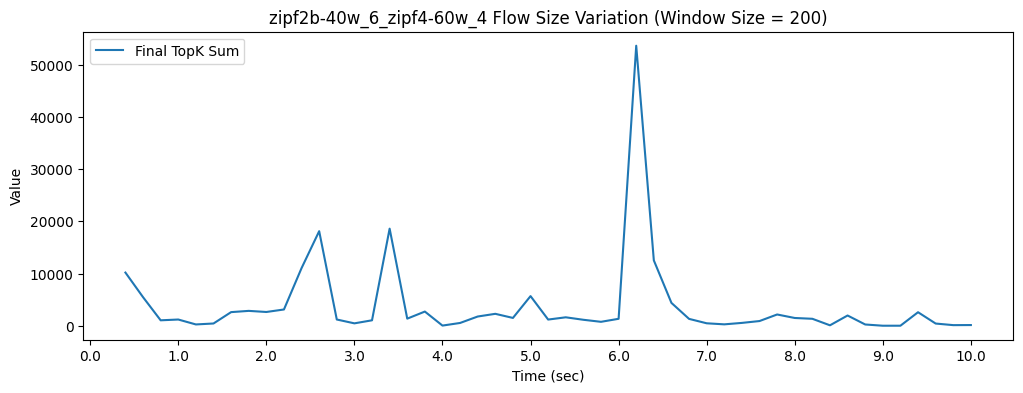

['Final TopK Sum', 'Final TopK Sec Var'] 2
[[None, None, 4278, 2244, 551, 1983, 1680, 738, 877, 1541, 1075, 3005, 5741, 8955, 1832, 1153, 497, 10466, 1555, 603, 359, 2705, 2747, 398, 614, 4794, 86, 2364, 1116, 400, 331, 10078, 12495, 4417, 1330, 499, 296, 568, 932, 2182, 1511, 1360, 116, 1995, 268, 34, 34, 2618, 451, 146, 164]] 1
[0, 52962, 101646, 148086, 195077, 240085, 286773, 332723, 377796, 421328, 465935, 513547, 555418, 588334, 623082, 656677, 689775, 733339, 775348, 816754, 857801, 901553, 942558, 983961, 1024750, 1070333, 1115830, 1158963, 1200980, 1243397, 1285483, 1317491, 1337004, 1352100, 1365866, 1379133, 1392696, 1405691, 1417754, 1431999, 1444733, 1456107, 1467597, 1477092, 1486319, 1495580, 1504807, 1516652, 1528046, 1539294, 1550378]
[None, 52962, 48684, 46440, 46991, 45008, 46688, 45950, 45073, 43532, 44607, 47612, 41871, 32916, 34748, 33595, 33098, 43564, 42009, 41406, 41047, 43752, 41005, 41403, 40789, 45583, 45497, 43133, 42017, 42417, 42086, 32008, 19513, 15096, 

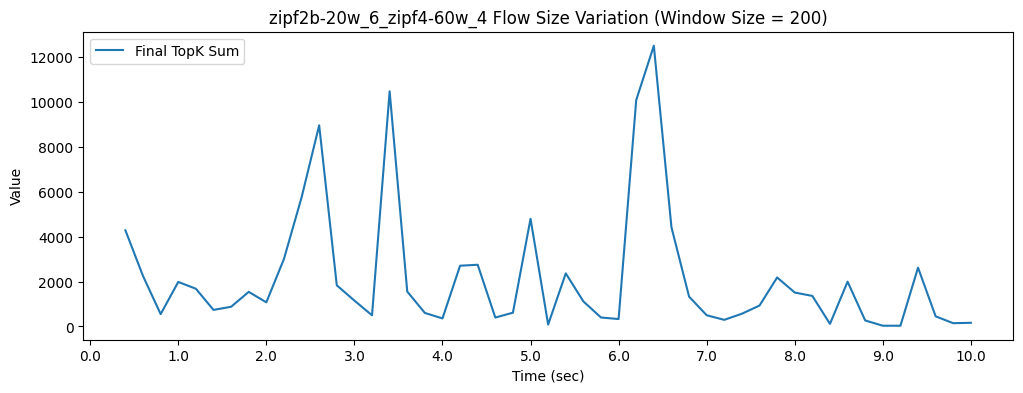

['Final TopK Sum', 'Final TopK Sec Var'] 2
[[None, None, 3338, 483, 1460, 1405, 452, 646, 127, 112, 2622, 60, 1469, 2979, 740, 1002, 815, 6092, 811, 652, 63, 2937, 1648, 1584, 970, 1462, 735, 440, 1145, 617, 873, 10063, 12460, 4411, 1320, 509, 302, 558, 948, 2188, 1511, 1360, 119, 1996, 270, 35, 29, 2612, 455, 141, 167]] 1
[0, 28084, 52830, 78059, 104748, 130032, 155768, 180858, 205821, 230672, 252901, 275190, 296010, 313851, 332432, 350011, 366775, 389631, 411676, 433069, 454525, 478918, 501663, 522824, 544955, 568548, 591406, 614704, 636857, 659627, 681524, 713484, 732984, 748073, 761842, 775102, 788664, 801668, 813724, 827968, 840701, 852074, 863566, 873062, 882288, 891549, 900781, 912625, 924014, 935262, 946343]
[None, 28084, 24746, 25229, 26689, 25284, 25736, 25090, 24963, 24851, 22229, 22289, 20820, 17841, 18581, 17579, 16764, 22856, 22045, 21393, 21456, 24393, 22745, 21161, 22131, 23593, 22858, 23298, 22153, 22770, 21897, 31960, 19500, 15089, 13769, 13260, 13562, 13004, 12056, 1

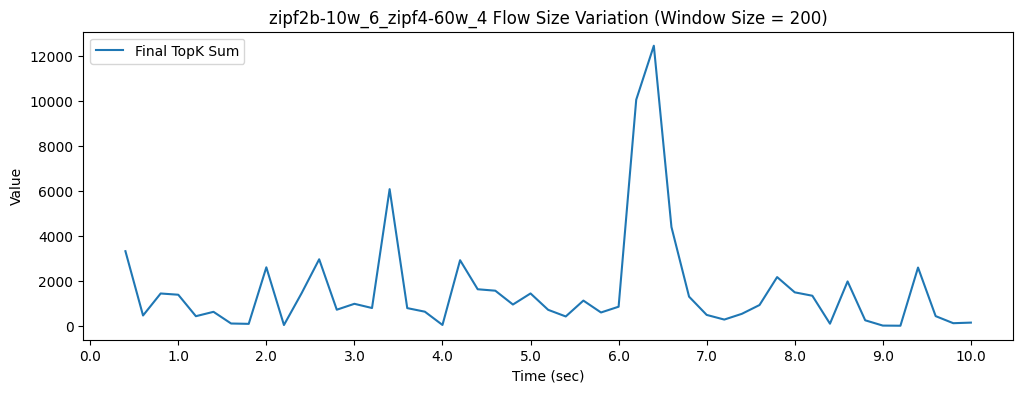

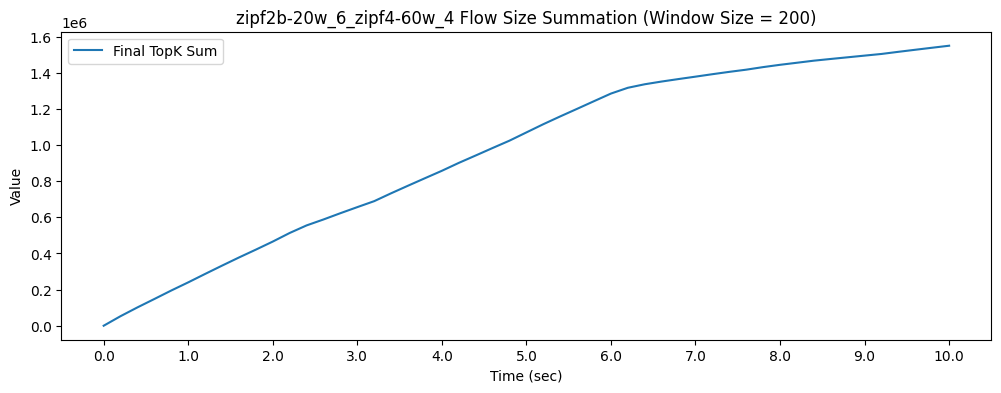

In [109]:
plot_total_size_variation(dataset=pcap_file[0], window_size=200)
plot_total_size_variation(dataset=pcap_file[3], window_size=200)
plot_total_size_variation(dataset=pcap_file[6], window_size=200)
plot_total_size_summation(dataset=pcap_file[3], window_size=200)

### Predict Total Flow Size

In [2]:
def changes_occured(var, sec_var, n, ws=20):
    
    time_var = -1.0
    time_sec_var = -1.0
    
    val = 0
    max_time = -1.0
    
    # for each sliding window
    for i in range(len(var) - ws + 1):
        var_mean = np.mean(var[0+i:ws+i])
        var_std_dev = np.std(var[0+i:ws+i])
        
        # check by var outliers
        if abs(var[ws+i-1] - var_mean) > (n * var_std_dev):
            if time_var == -1.0:
                time_var = (1+(ws+i-1)-1)/5
                break
                
    for i in range(len(sec_var) - ws + 1):            
        sec_var_mean = np.mean(sec_var[0+i:ws+i])
        sec_var_std_dev = np.std(sec_var[0+i:ws+i])
        
        # check by sec var outliers
        if abs(sec_var[ws+i-1] - sec_var_mean) > (n * sec_var_std_dev):
            if time_sec_var == -1.0:
                time_sec_var = (2+(ws+i-1)-1)/5
                val = sec_var[ws+i-1]
                break
                
    if val == 0:
        val = max(sec_var)
        max_time = (2 + sec_var.index(val) - 1)/5
        
    
    var_hit = 0
    sec_var_hit = 0
    
    if time_var != -1.0:
        var_hit = 1
    if time_sec_var != -1.0:
        sec_var_hit = 1
    
    return var_hit, time_var, sec_var_hit, time_sec_var, val, max_time
    
    

In [3]:
def predict(algo='cm', row=3, width=[4096], level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], datasets=['zipf2a_3_caida20180517_7.pcap'], window_size=200, dev=3, ws=20):
    
    # total flow size
    res_sum3 = {}
    res_var3 = {}
    res_sec_var3 = {}
    
    label = []
    answer = []
    
    for d in datasets:
        for w in width:
            name = f'{d[:-5]}_{w}'
            res_var3[name] = [None]
            res_sec_var3[name] = [None, None]
            
            res_total = read_total_size_data(algo, row, w, level, seed, count, flowkey, epochs, d, window_size)

            label.append(name)
            answer.append(int(d.split('_')[1]))
            # answer.append(10)
            
            res_sum3[name] = res_total
            
            for i in range(1, len(res_total)):
                res_var3[name].append(res_total[i] - res_total[i-1])
                
            for i in range(2, len(res_var3[name])):
                res_sec_var3[name].append(abs(res_var3[name][i] - res_var3[name][i-1]))
            
    # res = read_data(algo, row, width, level, seed, count, flowkey, epochs, dataset, type, window_size)
    # print(label, len(label))
    # print(res_sum, len(res_sum))
    # print(res_var, len(res_var))
    # print(res_sec_var, len(res_sec_var))
    
    # print(answer)
    ignore = int(1000/window_size)
    choose = 5
    # dev = 3.4 # 99.90%
    # dev = 3 # 99.90%
    # dev = 3.719 # 99.99%
    iqr = 1.5
    # ws = 20
    
    pred3 = []
    
    norm_hit3 = 0
    iqr_hit3 = 0
    
    hit3 = []
    
    for i in range(len(label)):
        
        var_hit, time_var, sec_var_hit, time_sec_var, val, max_time = changes_occured(res_var3[label[i]][1:], res_sec_var3[label[i]][2:], dev, ws)
        
        pred3.append(time_sec_var)
           
        print(i)
        print(label[i])
        print('\tTotal Flow ')
        # print('\t\t', var_max3, var_avg3, var_diff3)
        # print('\t\t', max(res_sec_var3[label[i]][(1+ignore):end]), sum(res_sec_var3[label[i]][(1+ignore):end]) / len(res_sec_var3[label[i]][(1+ignore):end]), max(res_sec_var3[label[i]][(1+ignore):end]) - (sum(res_sec_var3[label[i]][(1+ignore):end]) / len(res_sec_var3[label[i]][(1+ignore):end])))
        print('\t\t', res_sec_var3[label[i]])
        print(f'\t\tvar: {time_var}, ans: {answer[i]}, change: {var_hit}')
        print(f'\t\tsec var: {time_sec_var}, ans: {answer[i]}, change: {sec_var_hit}')
        print(f'\t\t{val}, max time: {max_time}')
        print()
        
        if answer[i] == 10:
            if sec_var_hit == 0:
                hit3.append(1)
            else:
                hit3.append(0)
        else:
            if sec_var_hit == 1:
                hit3.append(1)
            else:
                hit3.append(0)
            
        

    succ3 = 0

    for i in range(len(label)):
        if hit3[i] == 1:
            if answer[i] == 10:
                succ3 += 1
            else:
                if abs(pred3[i] - answer[i]) <= 1.0:
                    succ3 += 1
    
    print("single comprehensive predict")
    print(f' total flow  predict: {succ3}/{len(pred3)} {succ3*100/len(pred3)}%')
    print()
    
    
    
    
        
# predict_final_dynamic_topk(width=widths, datasets=pcap_file)

In [105]:
predict(width=widths, datasets=pcap_file, window_size=200, dev=3, ws=25)

0
zipf2b-40w_6_zipf4-60w_4_4096
	Total Flow 
		 [None, None, 10205, 5497, 1068, 1219, 277, 458, 2634, 2873, 2661, 3139, 11059, 18126, 1221, 486, 1070, 18609, 1386, 2742, 59, 560, 1793, 2309, 1523, 5700, 1211, 1643, 1169, 779, 1358, 53615, 12534, 4398, 1341, 498, 295, 571, 927, 2182, 1513, 1359, 111, 1988, 269, 32, 34, 2615, 449, 144, 160]
		var: 6.0, ans: 6, change: 1
		sec var: 6.0, ans: 6, change: 1
		53615, max time: -1.0

1
zipf2b-40w_6_zipf4-30w_4_4096
	Total Flow 
		 [None, None, 10205, 5497, 1068, 1219, 277, 458, 2634, 2873, 2661, 3139, 11059, 18126, 1221, 486, 1070, 18609, 1386, 2742, 59, 560, 1793, 2309, 1523, 5700, 1211, 1643, 1169, 779, 1377, 69498, 6247, 2386, 605, 178, 92, 407, 176, 2175, 1836, 1012, 554, 948, 303, 78, 65, 1390, 317, 438, 276]
		var: 6.0, ans: 6, change: 1
		sec var: 6.0, ans: 6, change: 1
		69498, max time: -1.0

2
zipf2b-40w_6_zipf4-15w_4_4096
	Total Flow 
		 [None, None, 10205, 5497, 1068, 1219, 277, 458, 2634, 2873, 2661, 3139, 11059, 18126, 1221, 486,